c:\Users\Manoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Manoj\AppData\Local\Temp\ipykernel_19444\2474538237.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(crime_totals.index, rotation=45, ha="right", fontsize=10)


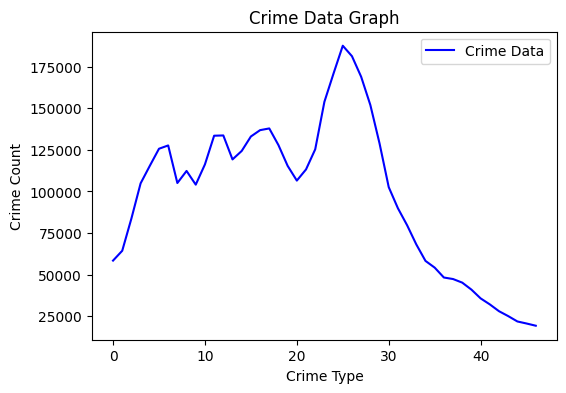

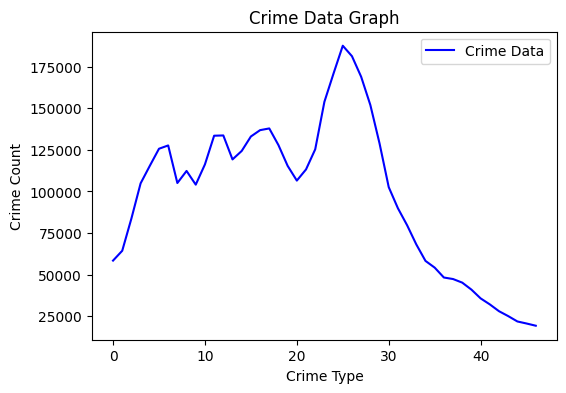

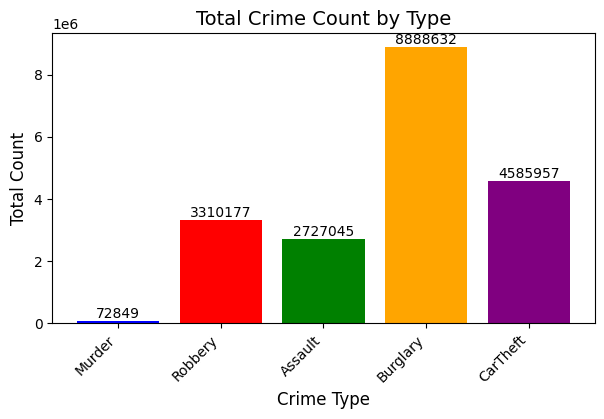

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


root = tk.Tk()
root.title("Crime Data Analysis")
root.geometry("900x600")
root.configure(bg="purple")


title_label = tk.Label(root, text="Crime Data Analysis",
                       bg="white", fg="blue", font=("Arial", 12, "bold"))
title_label.grid(row=0, column=0, columnspan=2, sticky="ew")


display_area = tk.Text(root, height=40, width=200, bg="white")
display_area.grid(row=1, column=1, rowspan=7, padx=10, pady=10)


dataset = None
model = None
scaler = None
X_columns = None


def upload_dataset():
    global dataset
    file_path = filedialog.askopenfilename(title="Select Dataset", filetypes=[("CSV Files", "*.csv")])
    if file_path:
        dataset = pd.read_csv(file_path)
        display_area.insert(tk.END, f"Dataset Uploaded: {file_path}\n")
        display_area.insert(tk.END, f"Dataset Preview:\n{dataset.head()}\n\n")

def generate_model():
    global model, scaler, X_columns
    if dataset is None:
        messagebox.showerror("Error", "Please upload a dataset first!")
        return
    
    try:
        X = dataset.iloc[:, :-1]  
        y = dataset.iloc[:, -1]   

        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        
        model = MLPRegressor(hidden_layer_sizes=(5,5), max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        X_columns = X.columns  

        display_area.insert(tk.END, "Model Trained Successfully!\n")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

def run_ann():
    if model is None:
        messagebox.showerror("Error", "Model not trained yet!")
        return
    display_area.insert(tk.END, "Running ANN Algorithm...\nModel Ready for Predictions.\n\n")

def predict_crime():
    if model is None or scaler is None:
        messagebox.showerror("Error", "Train the model first!")
        return
    
    input_window = tk.Toplevel(root)
    input_window.title("Enter Features for Prediction")
    input_window.geometry("400x300")

    input_entries = {}

    def get_prediction():
        try:
            input_values = [float(entry.get()) for entry in input_entries.values()]
            input_scaled = scaler.transform([input_values])
            prediction = model.predict(input_scaled)[0]
            display_area.insert(tk.END, f"Predicted Crime Count: {prediction:.2f}\n")
            input_window.destroy()
        except Exception as e:
            messagebox.showerror("Error", f"Invalid input: {e}")

    for i, col in enumerate(X_columns):
        tk.Label(input_window, text=f"{col}:").grid(row=i, column=0)
        entry = tk.Entry(input_window)
        entry.grid(row=i, column=1)
        input_entries[col] = entry

    tk.Button(input_window, text="Predict", command=get_prediction).grid(row=len(X_columns), column=1)

def show_graph():
    if dataset is None:
        messagebox.showerror("Error", "Upload a dataset first!")
        return

    graph_window = tk.Toplevel(root)
    graph_window.title("Crime Data Graph")
    graph_window.geometry("600x400")

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(dataset.iloc[:, -1], label="Crime Data", color="blue")
    ax.set_xlabel("Crime Type")
    ax.set_ylabel("Crime Count")
    ax.set_title("Crime Data Graph")
    ax.legend()

    canvas = FigureCanvasTkAgg(fig, master=graph_window)
    canvas.draw()
    canvas.get_tk_widget().pack()

# def show_bar():
#     if dataset is None:
#         messagebox.showerror("Error", "Upload a dataset first!")
#         return

#     bar_window = tk.Toplevel(root)
#     bar_window.title("Crime Type Distribution")
#     bar_window.geometry("600x400")

#     crime_types = ['Theft', 'Robbery', 'Assault', 'Burglary']
#     counts = [100, 50, 75, 25]

#     fig, ax = plt.subplots(figsize=(6, 4))
#     ax.bar(crime_types, counts, color=['blue', 'red', 'green', 'orange'])
#     ax.set_title('Crime Type Distribution')
#     ax.set_xlabel('Crime Type')
#     ax.set_ylabel('Frequency')

#     canvas = FigureCanvasTkAgg(fig, master=bar_window)
#     canvas.draw()
#     canvas.get_tk_widget().pack()

def show_bar():
    if dataset is None:
        messagebox.showerror("Error", "Upload a dataset first!")
        return

    bar_window = tk.Toplevel(root)
    bar_window.title("Crime Type Distribution")
    bar_window.geometry("700x500")

    try:
        # Summing up all crime occurrences across years
        crime_totals = dataset.iloc[:, 2:].sum()  # Exclude 'Year' and 'Population'

        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(crime_totals.index, crime_totals.values, 
                      color=['blue', 'red', 'green', 'orange', 'purple', 'brown'])

        ax.set_title('Total Crime Count by Type', fontsize=14)
        ax.set_xlabel('Crime Type', fontsize=12)
        ax.set_ylabel('Total Count', fontsize=12)
        
        # Rotate x-axis labels for better readability
        ax.set_xticklabels(crime_totals.index, rotation=45, ha="right", fontsize=10)
        
        # Add padding to prevent labels from being cut off
        plt.subplots_adjust(bottom=0.3)  

        # Display values on top of bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha='center', va='bottom', fontsize=10)

        canvas = FigureCanvasTkAgg(fig, master=bar_window)
        canvas.draw()
        canvas.get_tk_widget().pack()
    
    except Exception as e:
        messagebox.showerror("Error", f"Error generating bar chart: {e}")

def log_app():
    root.destroy()

btn_upload = tk.Button(root, text="Upload Crime Data Dataset", command=upload_dataset)
btn_generate = tk.Button(root, text="Read the Dataset & Generate Model", command=generate_model)
btn_ann = tk.Button(root, text="Run the Algorithm", command=run_ann)
btn_predict = tk.Button(root, text="Predict Crime Rate", command=predict_crime)
btn_graph = tk.Button(root, text="Crime Data Graph", command=show_graph)
btn_bar = tk.Button(root, text="Crime Type Bar Graph", command=show_bar)
btn_log = tk.Button(root, text="LogOut", command=log_app)


btn_upload.grid(row=1, column=0, padx=5, pady=5, sticky="w")
btn_generate.grid(row=2, column=0, padx=5, pady=5, sticky="w")
btn_ann.grid(row=3, column=0, padx=5, pady=5, sticky="w")
btn_predict.grid(row=4, column=0, padx=5, pady=5, sticky="w")
btn_graph.grid(row=5, column=0, padx=5, pady=5, sticky="w")
btn_bar.grid(row=6, column=0, padx=5, pady=5, sticky="w")
btn_log.grid(row=7, column=0, padx=5, pady=5, sticky="w")


root.mainloop()